In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import signal
import neurokit2 as nk

In [18]:
import utilities2 as ut

In [2]:
## import data
data = pd.read_csv('artlab/jumps/jump1.csv')

## clean
data = data.drop(columns=['Activity', 'User', 'Trial Number'])
data = data.drop([0])
data['Arduino Time'] = data['Arduino Time'] - data.loc[1]['Arduino Time']

data

,Time,Arduino Time,accel_X,accel_Y,accel_Z,gyro_X,gyro_Y,gyro_Z
1,60299.455,0.000000,8.902497,-3.885944,-0.289532,-0.086743,0.166155,0.343306
2,60299.455,0.007019,8.902497,-3.885944,-0.289532,-0.086743,0.166155,0.343306
3,60299.455,0.008972,8.902497,-3.885944,-0.289532,-0.086743,0.166155,0.343306
4,60299.470,0.010986,8.902497,-3.885944,-0.289532,-0.086743,0.166155,0.343306
5,60299.485,0.039978,8.902497,-3.885944,-0.289532,-0.086743,0.166155,-0.552222
...,...,...,...,...,...,...,...,...
834,60332.874,33.432007,12.388840,3.895515,-3.387041,1.100779,-0.464258,-0.516792
835,60332.905,33.447998,12.361322,3.895515,-2.352145,1.009149,-0.834442,-0.516792
836,60332.950,33.505005,14.568700,3.014956,0.636491,0.106291,-0.349415,-0.929737
837,60332.979,33.538025,14.568700,-7.289734,-4.825127,0.081856,-0.349415,-0.211359


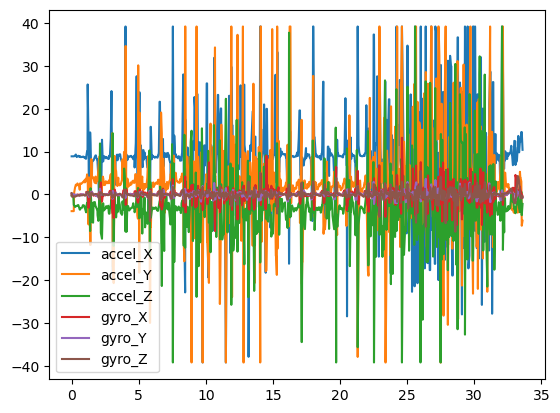

In [9]:
## data arrays
time = data['Arduino Time']
accel_X = data['accel_X']
accel_Y = data['accel_Y']
accel_Z = data['accel_Z']
gyro_X = data['gyro_X']
gyro_Y = data['gyro_Y']
gyro_Z = data['gyro_Z']

plt.plot(time, accel_X, label='accel_X')
plt.plot(time, accel_Y, label='accel_Y')
plt.plot(time, accel_Z, label='accel_Z')
plt.plot(time, gyro_X, label='gyro_X')
plt.plot(time, gyro_Y, label='gyro_Y')
plt.plot(time, gyro_Z, label='gyro_Z')
plt.legend()

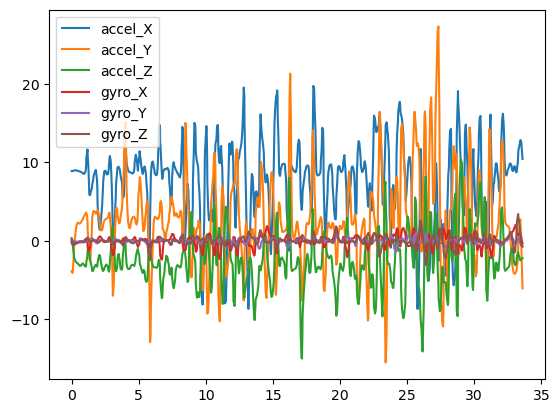

In [4]:
## filter
aX_filt = nk.signal_filter(accel_X, highcut = 100, method="butterworth", order=2)
aY_filt = nk.signal_filter(accel_Y, highcut = 100, method="butterworth", order=2)
aZ_filt = nk.signal_filter(accel_Z, highcut = 100, method="butterworth", order=2)
gX_filt = nk.signal_filter(gyro_X, highcut = 100, method="butterworth", order=2)
gY_filt = nk.signal_filter(gyro_Y, highcut = 100, method="butterworth", order=2)
gZ_filt = nk.signal_filter(gyro_Z, highcut = 100, method="butterworth", order=2)

plt.plot(time, aX_filt, label='accel_X')
plt.plot(time, aY_filt, label='accel_Y')
plt.plot(time, aZ_filt, label='accel_Z')
plt.plot(time, gX_filt, label='gyro_X')
plt.plot(time, gY_filt, label='gyro_Y')
plt.plot(time, gZ_filt, label='gyro_Z')
plt.legend()

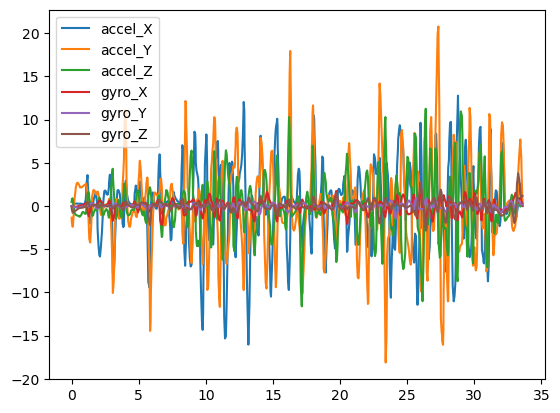

In [5]:
aX_filt2 = nk.signal_filter(aX_filt, lowcut = 10, method="butterworth", order=2)
aY_filt2 = nk.signal_filter(aY_filt, lowcut = 10, method="butterworth", order=2)
aZ_filt2 = nk.signal_filter(aZ_filt, lowcut = 10, method="butterworth", order=2)
gX_filt2 = nk.signal_filter(gX_filt, lowcut = 10, method="butterworth", order=2)
gY_filt2 = nk.signal_filter(gY_filt, lowcut = 10, method="butterworth", order=2)
gZ_filt2 = nk.signal_filter(gZ_filt, lowcut = 10, method="butterworth", order=2)

plt.plot(time, aX_filt2, label='accel_X')
plt.plot(time, aY_filt2, label='accel_Y')
plt.plot(time, aZ_filt2, label='accel_Z')
plt.plot(time, gX_filt2, label='gyro_X')
plt.plot(time, gY_filt2, label='gyro_Y')
plt.plot(time, gZ_filt2, label='gyro_Z')
plt.legend()

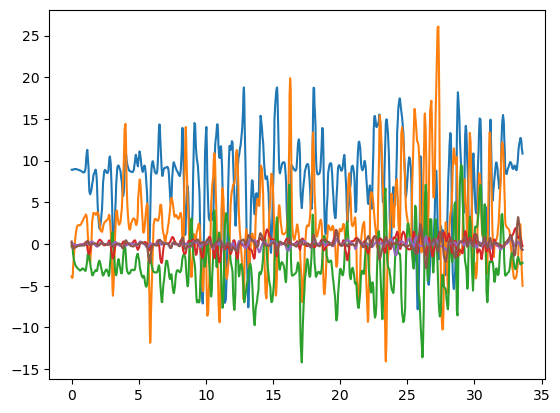

In [11]:
time_X, acc_X = ut.getMovAvg_bare(data, 'accel_X')
time_Y, acc_Y = ut.getMovAvg_bare(data, 'accel_Y')
time_Z, acc_Z = ut.getMovAvg_bare(data, 'accel_Z')
time_Xg, gyro_X = ut.getMovAvg_bare(data, 'gyro_X')
time_Yg, gyro_Y = ut.getMovAvg_bare(data, 'gyro_Y')
time_Zg, gyro_Z = ut.getMovAvg_bare(data, 'gyro_Z')

plt.plot(time_X,acc_X, label = 'accel_X')
plt.plot(time_Y,acc_Y, label = 'accel_Y')
plt.plot(time_Z,acc_Z, label = 'accel_Z')
plt.plot(time_Xg,gyro_X, label = 'gyro_X')
plt.plot(time_Yg,gyro_Y, label = 'gyro_Y')
plt.plot(time_Zg,gyro_Z, label = 'gyro_Z')

In [16]:
import bokeh
from bokeh.plotting import figure, output_notebook, show, reset_output
from bokeh.models import Span
output_notebook()

Loading BokehJS ...

In [19]:
path = '/Users/isabellagomez/Documents/Tesis/Classification_v2/artlab/jumps/jump1.csv'
df = ut.cleanRead(path)
left_x, right_x = ut.tightBounds(df,mode='mult',fat_avg = 15, prom=.2, peakFinding='scipy', int_size=0.8, step_size=0.05)

offset = 0

output_notebook()
p = figure()
p.line(df.Time.values-df.Time.values[0], df.accel_Y.values, line_width=2, line_color='forestgreen', line_alpha = 1)


for (l,r) in zip(left_x,right_x):
    LEFT = Span(location=l-offset, dimension='height',
                   line_color='red', line_width=2, line_alpha = .5)
    RIGHT = Span(location=r+offset, dimension='height',
                   line_color='blue', line_width=2, line_alpha = .5)
    p.add_layout(LEFT)
    p.add_layout(RIGHT)

show(p)


Loading BokehJS ...